In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

Estimation of uncertainty in our predictions while doing regression is an activity of interest for many reasons such as understanding how confident we are about our prediction $\hat{y}$ at a given $x$ value. In this exercise, we will learn how to esimtate the mulitple measures of uncertainty in a linear regression model.

# Inference on Regression Coefficients: $\beta$

## 1 $\mathbb{E}[\hat{\beta}]$

In this first section, we estimate the mean and the variance of the estimated coefficients of the linear regression model ($\beta$).

Again going back to the standard linear model

$$
Y = X\beta + \epsilon; \quad \epsilon \sim N(0,\sigma^2I)\tag{1}
$$

Assuming X to be deterministic and $\beta$ to be the fixed but unknown set of weights, when we take expectation over the sampling distribution on both sides of (1) we get
$$
\mathbb{E}[Y] = X\beta\tag{2}
$$

Also, recalling from previous exercises the OLS solution for $\beta$:

$$\hat{\beta} = (X^TX)^{-1}X^TY$$

Hence we have:

\begin{align}
\mathbb{E}[\hat{\beta}] &= \mathbb{E}[(X^TX)^{-1}X^TY]\\
&= (X^TX)^{-1}X^T \mathbb{E}[Y]\\
&= (X^TX)^{-1}X^TX\beta, \quad \text{from (2)}\\
&= \beta \tag{3}
\end{align}

$\textbf{Since $\mathbb{E}[\hat{\beta}] = \beta$, hence the estimate $\hat{\beta}$ is an unbiased estimate}$. Hence, with enough samples, the sample estimate $\hat{\beta}$ tends to the true population weight $\beta$  



## 2 $\widehat{st.dev.}(\hat{\beta})$

From homoscedasticity and assumption of no correlation, we have: $Cov(Y) = \sigma^2I$

Additionally, since $\hat{\beta} = (X^TX)^{-1}X^TY$, we have

$$Cov(\hat{\beta}) = (X^TX)^{-1}X^T Cov(y) X (X^TX)^{-1} = \sigma^2(X^TX)^{-1}$$

which gives 
$$st.dev(\hat{\beta_i}) = \sqrt{i^{th}\text{ diagonal entry of }Cov(\hat{\beta})} = \sigma\sqrt{(X^TX)^{-1}_{ii}}  $$

and hence

$$\widehat{st.dev}(\hat{\beta_i}) = \hat{\sigma}\sqrt{(X^TX)^{-1}_{ii}} \tag{4}$$

From lecture on Regression diagnostics

$$\hat{\sigma}^2 \equiv \frac{||Y - \hat{Y}||_2^2}{n-p} = \frac{||(I - H)Y||_2^2}{n-p}$$


## 3 Confidence Interval (CI) for $\hat{\beta}$

Under the assumption $\epsilon \sim N(0,\sigma^2I)$, $\textbf{$100(1-\alpha)\%$ confidence interval for $\beta_i$}$ is

$$
\hat{\beta}_i \pm \widehat{st.dev}(\hat{\beta}_i) \cdot t \Big(1 - \frac{\alpha}{2};n-p\Big)
$$

Here:
1. n: number of samples
2. p: number of regression parameters
2. $t(q;m)$: 100qth percentile of the t-distribution with m degrees of freedom. Hence if we want 95\% CI, we have
$$
100(1 - \alpha) = 95 \implies \alpha = 0.05 \tag{5}
$$

$\textbf{Please Note}$:

1. These $100(1-\alpha)\%$ intervals assume errors are independent, normally distributed and have constant variance
2. However, these intervals are fairly robust to non-normality
3. On the other hand, very sensitive to correlated errors

## Generating data

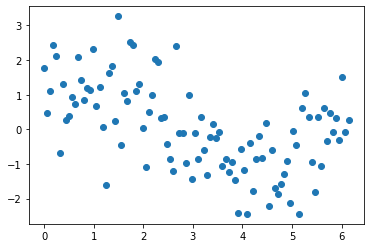

In [30]:
np.random.seed(0)
x = np.linspace(0,6.14,100)
y = np.sin(x)
err = np.random.randn(len(x))
y_noisy = y+err
plt.scatter(x,y_noisy)
plt.show()

### Fitting a high degree polynomial

$$y = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3 + \beta_4x^4 + \beta_5x^5 + \beta_6x^6 + \beta_7x^7$$

In [21]:
## compute variance

def poly_power(x,n):
    X = []
    for i in x:
        temp = []
        for j in range(n+1):
            temp.append(i**j)
                
        X.append(temp)
    return np.array(X)
poly_power([1,2,3],n = 7)

array([[   1,    1,    1,    1,    1,    1,    1,    1],
       [   1,    2,    4,    8,   16,   32,   64,  128],
       [   1,    3,    9,   27,   81,  243,  729, 2187]])

In [22]:
X = poly_power(x,n = 7)
X.shape

(100, 8)

### Computing $\hat{\beta}$ and plotting the prediction

In [23]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y_noisy))
beta

array([ 1.52611081e+00, -3.05544548e+00,  5.28548337e+00, -3.78386598e+00,
        1.32920256e+00, -2.59146063e-01,  2.74042599e-02, -1.22145858e-03])

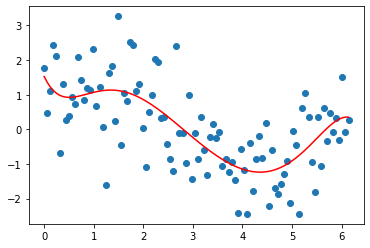

In [24]:
pred = X.dot(beta)
## plotting the prediction
plt.plot(X[:,1],pred,color = 'r')
plt.scatter(X[:,1],y_noisy)
plt.show()

### Computing $\hat{\sigma}$

In [25]:
H = X.dot(np.linalg.inv(X.T.dot(X))).dot(X.T)
hii = np.diag(H)
e = y_noisy - pred
var = np.linalg.norm(e)**2/(len(y_noisy) - 8)
std = np.sqrt(var)
std

0.9558848191390442

### Computing $\widehat{st.dev}(\hat{\beta_i})$

In [26]:
std_beta = std*np.sqrt(np.diag(np.linalg.inv(X.T.dot(X))))
std_beta

array([6.58633688e-01, 4.03743822e+00, 7.84205673e+00, 6.68695338e+00,
       2.90217952e+00, 6.69360312e-01, 7.81044015e-02, 3.62502836e-03])

### Computing $\widehat{st.dev}(\hat{\beta_i})\cdot t \Big(1 - \frac{\alpha}{2};n-p\Big)$ for all i

In [27]:
confidence = 0.95
alpha = 0.05
stdev_t = std_beta*scipy.stats.t.ppf(1 - alpha/2.,len(y_noisy) - 8)

### Computing $\hat{\beta}_i \pm \widehat{st.dev}(\hat{\beta}_i) \cdot t \Big(1 - \frac{\alpha}{2};n-p\Big)$

In [28]:
print('Interval for beta is: ')
for i in range(len(beta)):
    low = np.round(beta[i]-stdev_t[i],2)
    high = np.round(beta[i]+stdev_t[i],2)
    print(f'[{low},{high}]')

Interval for beta is: 
[0.22,2.83]
[-11.07,4.96]
[-10.29,20.86]
[-17.06,9.5]
[-4.43,7.09]
[-1.59,1.07]
[-0.13,0.18]
[-0.01,0.01]


### <mark style="background-color: #FFFF00">Exercise</mark> 

1. What can you infer from these intervals ?
2. Fit $y = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3 sin(x)$ to the same data and infer the 95% confidence intervals for all parameters involved